In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Matches Dataset:

In [2]:
data = pd.read_csv("C:\\Users\\sghoz\\OneDrive\\Desktop\\Datasets\\SparksTask5\\matches.CSV")
df = pd.DataFrame(data)
df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN


In [3]:
#Getting the number of rows and columns of the dataframe
df.shape

(636, 18)

In [4]:
#Getting info about our df as number of rows,columns, number of non null values for each column, data type for each column, memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

# Let's cast the type of the date column into datetime so that if we wanted to do any analysis on it in the future.

In [5]:
#Casting the date column to a datetime type.
df['date'] = pd.to_datetime(df['date'])

In [6]:
#Also we can cast the dl_applied into categorical type as it only shows whether the dl method was applied or not with values 0 and 1
df['dl_applied'] = pd.Categorical(df['dl_applied'])

In [7]:
#Getting the null values of all of the columns in the df.
df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

In [8]:
#We'll drop the umpire3 column as all of it contains null values.
df.drop("umpire3",inplace=True,axis=1)

# Let's check the null values for each column, to see whetehr they're missed at random , completely at random, not at random 

In [9]:
#Checking the 3 rows that contain null values for the winner column.
df[df["winner"].isna()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan


In [10]:
#Checking the counts of different values of the result column.
df["result"].value_counts()

result
normal       626
tie            7
no result      3
Name: count, dtype: int64

# We've recognized that the 3 null values of the winner column occur with that of the player of match where both of them occur when the result of the match is of value "No result" which shows that these null values are not missed at random. Thus, we are not going to drop them

In [11]:
df[df["umpire1"].isna()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


# Also the null value of the umpire1 occured with that of umpire2 , we don't see here any kind of pattern that explains this null value so we can drop this row. 

In [12]:
df.dropna(subset=['umpire1'], inplace=True)

In [13]:
#Checking the 7 rows containing null values for the city column.
df[df["city"].isna()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus


# There's isn't any kinf of pattern that explains the presence of the null values so we can drop these rows

In [14]:
df.dropna(subset=['city'], inplace=True)

# Let's check the shape after all of these droppings

In [15]:
df.shape

(628, 17)

In [16]:
#Getting more info on the non-object columns
df.describe()

,id,season,date,win_by_runs,win_by_wickets
count,628.000000,628.000000,628,628.000000,628.000000
mean,317.321656,2012.466561,2012-10-16 04:35:09.554140160,13.791401,3.378981
min,1.000000,2008.000000,2008-04-18 00:00:00,0.000000,0.000000
25%,158.750000,2010.000000,2010-04-10 00:00:00,0.000000,0.000000
50%,315.500000,2012.000000,2012-05-18 12:00:00,0.000000,4.000000
75%,479.250000,2015.000000,2015-04-22 06:00:00,20.000000,7.000000
max,636.000000,2017.000000,2017-05-21 00:00:00,146.000000,10.000000
std,183.794573,2.780170,NaN,24.031136,3.424697


In [17]:
#Checking for duplicates
df.duplicated().any()

False

In [18]:
# Group by year and count the number of matches
matches_per_year = df.groupby('season')['id'].count()
matches_per_year

season
2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    53
2015    59
2016    60
2017    58
Name: id, dtype: int64

In [19]:
fig = px.line(x=matches_per_year.index, y=matches_per_year.values, title='The number of matches held in every year',
              labels={'x': 'Year', 'y': 'Number of Matches'})

fig.show()


# The max number of matches played were in 2013 (76 matches) where the min was played in 2014 (53 matches) 

In [20]:
cities = df["city"].value_counts()
cities = cities[0:10]
cities

city
Mumbai        85
Bangalore     65
Kolkata       61
Delhi         60
Hyderabad     49
Chennai       48
Chandigarh    46
Jaipur        33
Pune          32
Durban        15
Name: count, dtype: int64

In [21]:
fig = px.pie(df, values=cities.values, names=cities.index, title='Top 10 Cities Hosting the matches')
fig.show()

# Mumbai is the city where most of the matches were hosted (85 matches)

# Let's analyze patterns found in the columns of this dataset

In [22]:
subset_matches = df[["team1","team2","winner","player_of_match","win_by_runs","city","venue"]]


# Replace NaN values with an empty string
subset_matches['winner'] = subset_matches['winner'].fillna('')
subset_matches['player_of_match'] = subset_matches['player_of_match'].fillna('')


# Group by 'team1' and 'team2' and 'winner
subset_matches =  subset_matches.groupby(['city','venue','team1','team2','winner',"player_of_match"]).agg({
    'win_by_runs': 'sum'
}).reset_index()

subset_matches

C:\Users\sghoz\AppData\Local\Temp\ipykernel_17288\1822480370.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\sghoz\AppData\Local\Temp\ipykernel_17288\1822480370.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,city,venue,team1,team2,winner,player_of_match,win_by_runs
0,Abu Dhabi,Sheikh Zayed Stadium,Chennai Super Kings,Delhi Daredevils,Chennai Super Kings,SK Raina,93
1,Abu Dhabi,Sheikh Zayed Stadium,Chennai Super Kings,Kings XI Punjab,Kings XI Punjab,GJ Maxwell,0
2,Abu Dhabi,Sheikh Zayed Stadium,Kings XI Punjab,Kolkata Knight Riders,Kings XI Punjab,Sandeep Sharma,23
3,Abu Dhabi,Sheikh Zayed Stadium,Kolkata Knight Riders,Mumbai Indians,Kolkata Knight Riders,JH Kallis,41
4,Abu Dhabi,Sheikh Zayed Stadium,Rajasthan Royals,Kolkata Knight Riders,Rajasthan Royals,JP Faulkner,0
...,...,...,...,...,...,...,...
612,Visakhapatnam,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,Mumbai Indians,Kings XI Punjab,Kings XI Punjab,MP Stoinis,0
613,Visakhapatnam,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,DA Warner,16
614,Visakhapatnam,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,Sunrisers Hyderabad,Mumbai Indians,Sunrisers Hyderabad,A Nehra,85
615,Visakhapatnam,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,AM Rahane,0


In [24]:
fig = px.treemap(subset_matches, path=[px.Constant('Matches'), 'city','venue','winner' ,'team2', 'player_of_match'], values='win_by_runs',
                  color='team1')
fig.show()

# This treemap illustrates the distribution of matches across different cities and venues. Each rectangle represents a match between two teams, with the larger rectangle indicating the winning team. Inside this rectangle, we find the team that was defeated by the winner. Within the rectangle of the defeated team, the player of the match is displayed. The size of each rectangle is determined by the margin of victory, represented by 'win by runs'.

In [25]:
men_of_match = df["player_of_match"].value_counts()
men_of_match

player_of_match
CH Gayle           18
YK Pathan          16
DA Warner          15
AB de Villiers     15
SK Raina           14
                   ..
J Theron            1
AA Jhunjhunwala     1
WPUJC Vaas          1
AD Mathews          1
BCJ Cutting         1
Name: count, Length: 201, dtype: int64

In [26]:
filtered_counts = men_of_match[men_of_match > 4]

C:\Users\sghoz\AppData\Local\Temp\ipykernel_18180\127659030.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




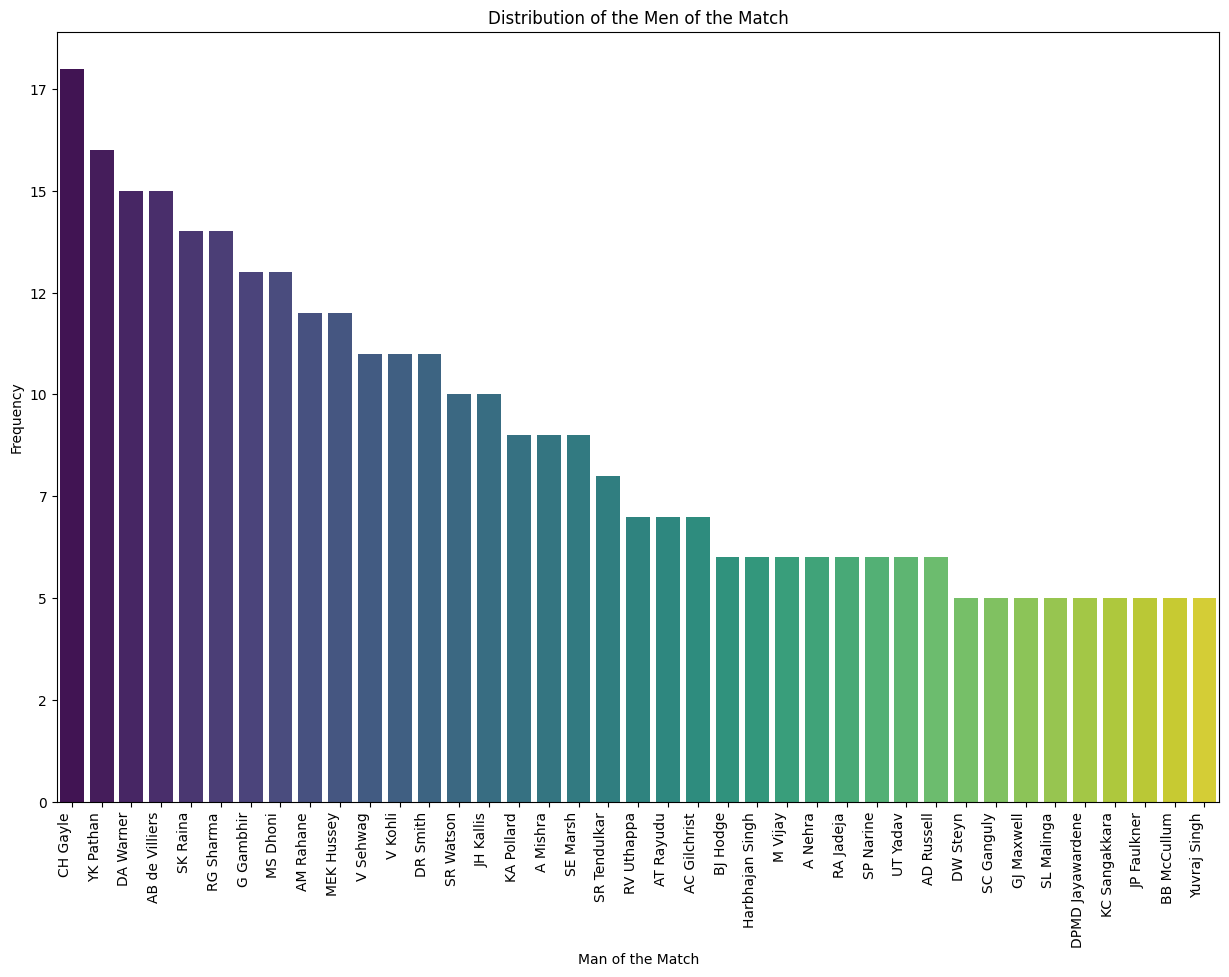

In [27]:
# Create a bar plot for the various players who were chosen to be the man of the match.
plt.figure(figsize=(15, 10))
sns.barplot(x=filtered_counts.index, y=filtered_counts, palette='viridis')

# Formatting the y-axis tick labels as integers
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))

# This is used to avoid the overlapping of the labels of the x-axis
plt.xticks(rotation=90, ha='right')
plt.title('Distribution of the Men of the Match')
plt.xlabel('Man of the Match')
plt.ylabel('Frequency')
plt.show()


# This shows that CH Gayle was the one chosen the most as the man of the match (18 matches) followe dby YK Pathan for 16 matches

In [28]:
# Group the data by 'dl_applied' and 'result', and count the occurrences
result_counts = df.groupby(['dl_applied', 'result']).size().reset_index(name='count').sort_values(by='count', ascending=False)

# Plot the grouped bar chart
fig = px.bar(result_counts, x='result', y='count', color='dl_applied',
             barmode='group', labels={'result': 'Result', 'count': 'Count', 'dl_applied': 'DL Applied'})
fig.update_layout(title='Count of DL Applied vs. Result')
fig.show()

C:\Users\sghoz\AppData\Local\Temp\ipykernel_18180\1858949363.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

c:\Users\sghoz\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\express\_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



# We can see that the results of most of the matches were normal where most of them the dl method was not applied (602 matches), only in 16 matches that method was applied

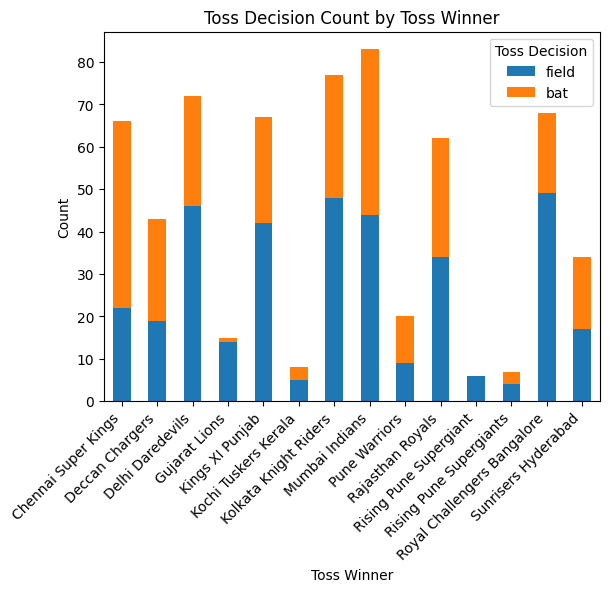

In [164]:
# Group the data by 'toss_winner' and count the occurrences of each toss decision
toss_decision_counts = df.groupby('toss_winner')['toss_decision'].value_counts().unstack().fillna(0)

# Calculate the total counts of each toss decision across all toss winners
total_counts = toss_decision_counts.sum(axis=0)

# Sort the total counts in descending order
sorted_counts = total_counts.sort_values(ascending=False)

# Reorder the DataFrame columns based on the sorted counts
toss_decision_counts_sorted = toss_decision_counts[sorted_counts.index]

# Plot the bar chart
toss_decision_counts_sorted.plot(kind='bar', stacked=True)
plt.title('Toss Decision Count by Toss Winner')
plt.xlabel('Toss Winner')
plt.ylabel('Count')
plt.legend(title='Toss Decision', loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.show()

# It's obvious that Mumbai Indians is the msot team who won the toss where most of his decisions where "field"

In [158]:
winners = df[["winner","win_by_wickets","win_by_runs"]]
winners = winners.groupby("winner").agg({ "win_by_wickets": "sum","win_by_runs": "sum"})
winners = winners.sort_values(by=['win_by_runs','win_by_wickets'], ascending=False)
winners

,win_by_wickets,win_by_runs
winner,,
Chennai Super Kings,201,1580
Mumbai Indians,270,1532
Royal Challengers Bangalore,270,1181
Kolkata Knight Riders,291,897
Kings XI Punjab,222,862
Rajasthan Royals,233,821
Delhi Daredevils,264,571
Sunrisers Hyderabad,117,457
Deccan Chargers,72,421


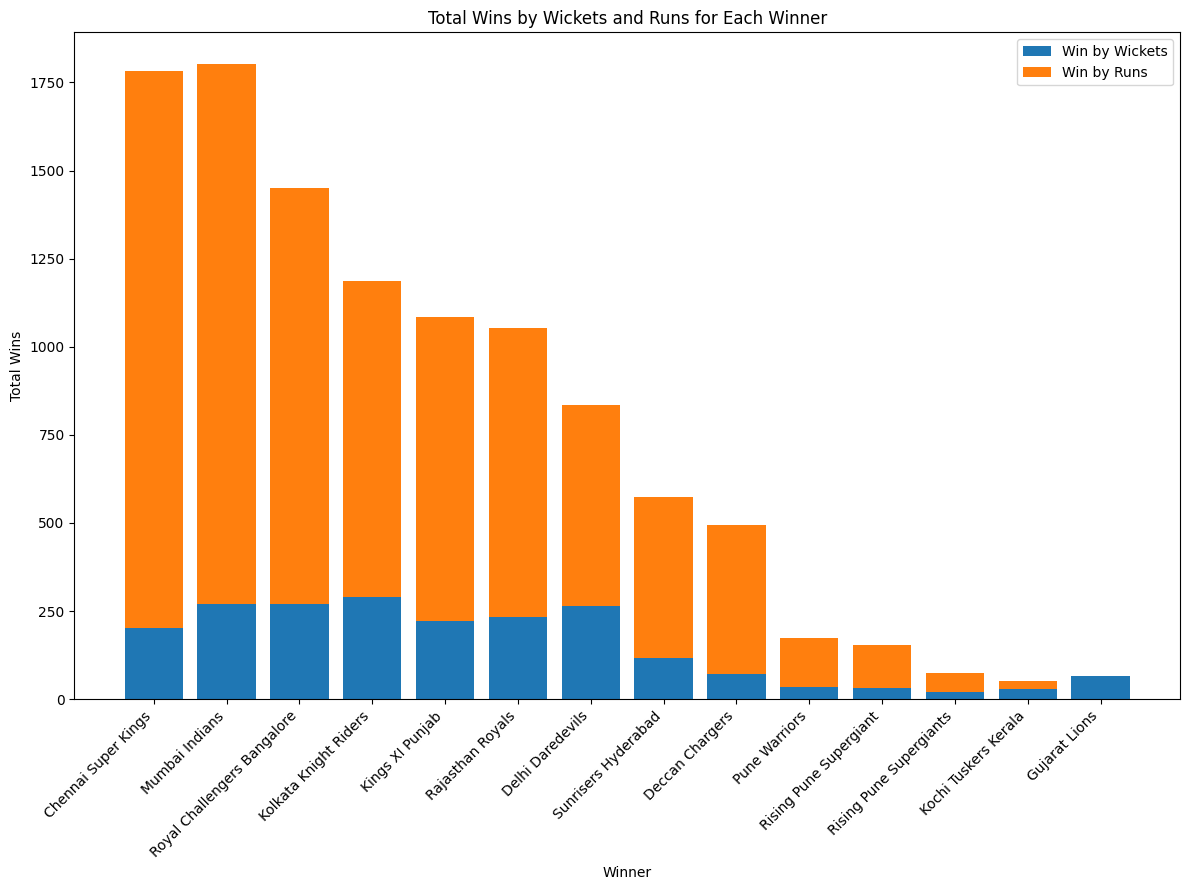

In [121]:
# Grouped bar chart for each winner
plt.figure(figsize=(12,9))
plt.bar(winners.index, winners['win_by_wickets'], label='Win by Wickets')
plt.bar(winners.index, winners['win_by_runs'], bottom=winners['win_by_wickets'], label='Win by Runs')

# Adding labels and titles
plt.xlabel('Winner')
plt.ylabel('Total Wins')
plt.title('Total Wins by Wickets and Runs for Each Winner')
plt.xticks(rotation=45, ha='right')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

# This shows that Mumbai Indians is the team who won the most where most of the matches were won by runs

In [144]:
umpire1 = df["umpire1"].value_counts()
umpire1 = umpire1[umpire1 > 19]

umpire2 = df["umpire2"].value_counts()
umpire2 = umpire2[umpire2 > 19]

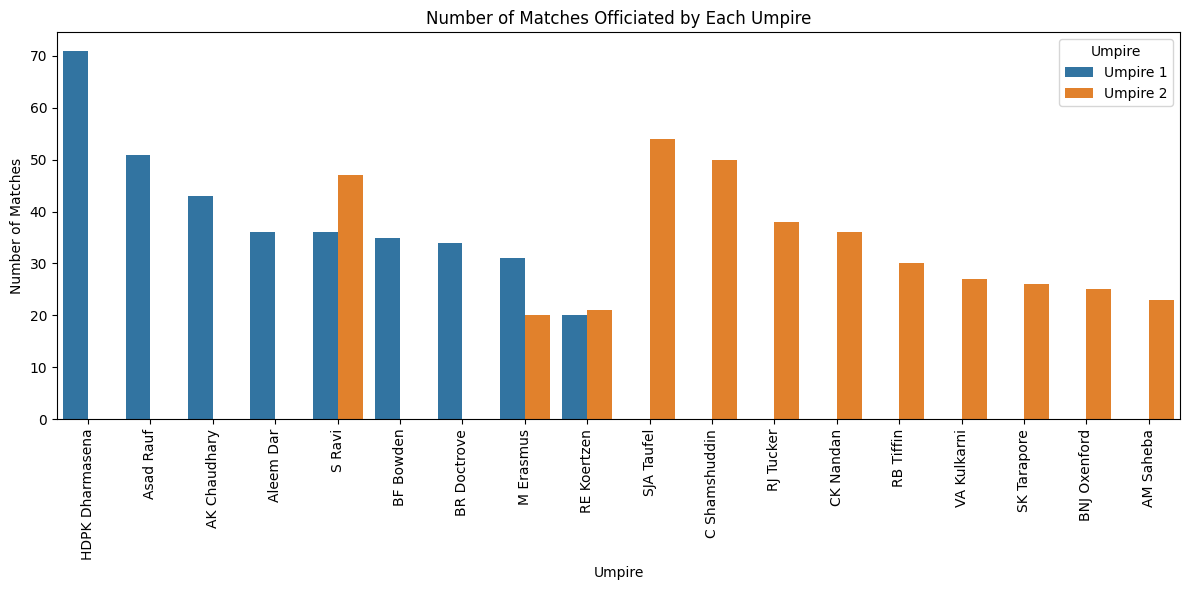

In [145]:
# Combine umpire1 and umpire2 data
umpires_combined = pd.concat([umpire1.rename('Umpire 1'), umpire2.rename('Umpire 2')], axis=1)

# Melt the DataFrame for plotting
umpires_melted = umpires_combined.reset_index().melt(id_vars='index', var_name='Umpire', value_name='Number of Matches')

# Plotting the data
plt.figure(figsize=(12, 6))
sns.barplot(data=umpires_melted, x='index', y='Number of Matches', hue='Umpire')

# Adding labels and titles
plt.xlabel('Umpire')
plt.ylabel('Number of Matches')
plt.title('Number of Matches Officiated by Each Umpire')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend(title='Umpire')

# Show plot
plt.tight_layout()
plt.show()


# This shows that HPDL DHarmasena was chosen the most as umpire1 , and SJA Taufel as umpire2 while S Ravi was the one chosen (separately) as umpire1 and umpire 2 a lot 

# Deliveries Dataset

In [3]:
data2 = pd.read_csv("C:\\Users\\sghoz\\OneDrive\\Desktop\\Datasets\\SparksTask5\\Deliveries.CSV")
df2 = pd.DataFrame(data2)
df2

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150455,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,Sachin Baby,CJ Jordan,B Kumar,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
150456,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,Sachin Baby,CJ Jordan,B Kumar,0,...,0,0,0,0,0,0,0,CJ Jordan,run out,NV Ojha
150457,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,4,Iqbal Abdulla,Sachin Baby,B Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
150458,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,5,Sachin Baby,Iqbal Abdulla,B Kumar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [4]:
df2.shape

(150460, 21)

# Let's get to know more about our dataset

In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          150460 non-null  int64 
 1   inning            150460 non-null  int64 
 2   batting_team      150460 non-null  object
 3   bowling_team      150460 non-null  object
 4   over              150460 non-null  int64 
 5   ball              150460 non-null  int64 
 6   batsman           150460 non-null  object
 7   non_striker       150460 non-null  object
 8   bowler            150460 non-null  object
 9   is_super_over     150460 non-null  int64 
 10  wide_runs         150460 non-null  int64 
 11  bye_runs          150460 non-null  int64 
 12  legbye_runs       150460 non-null  int64 
 13  noball_runs       150460 non-null  int64 
 14  penalty_runs      150460 non-null  int64 
 15  batsman_runs      150460 non-null  int64 
 16  extra_runs        150460 non-null  int

In [6]:
df2.isna().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    143022
dismissal_kind      143022
fielder             145091
dtype: int64

In [7]:
#Checking whether the null values of these 2 columns occur with each other or not.
null_count = 0
for i in range(df2.shape[0]): 
    
        if pd.isna(df2["player_dismissed"].iloc[i]) and pd.isna(df2["dismissal_kind"].iloc[i]):
            null_count += 1

null_count        

143022

# Although we have a lot of null values for the player_dismissed column, we are not going to drop it as it's not necessary to have players being dismissed in each match as a result there wouldn't be a dismissal kind 

In [8]:
#Checking whether the third column with null values occur with those of the other 2 columns or not.
null_count = 0
for i in range(df2.shape[0]): 
    
        if pd.isna(df2["player_dismissed"].iloc[i]) and pd.isna(df2["fielder"].iloc[i]):
            null_count += 1

null_count        

143022

# This shows that most of the null values in the fielder column also occurred with all of the null values that occured within the other 2 columns. We conclude that there may be a relationship (pattern) behind this. As a result, we won't drop the fielder column

In [9]:
#Checking for duplicated rows.
df2.duplicated().any()

True

In [10]:
#Checking these duplicated row(s).
df2[df2.duplicated()]

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
52178,221,1,Mumbai Indians,Delhi Daredevils,4,1,SR Tendulkar,C Madan,PJ Sangwan,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [11]:
#It's just one row that is duplicated. We're going to drop it then we're going to observe the shape of the df after dropping.
df2.drop_duplicates(inplace=True)
df2.shape

(150459, 21)

# As expected, the number of rows has been reduced by 1.

In [12]:
df2.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,150459.000000,150459.000000,150459.000000,150459.000000,150459.000000,150459.000000,150459.000000,150459.000000,150459.000000,150459.000000,150459.000000,150459.000000,150459.000000
mean,318.281964,1.482191,10.142690,3.616500,0.000538,0.037499,0.004885,0.022232,0.004340,0.000066,1.222446,0.069022,1.291468
std,182.955967,0.501768,5.674335,1.807691,0.023196,0.257398,0.114235,0.200105,0.072652,0.018229,1.594515,0.349668,1.583245
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,161.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,319.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,476.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,636.000000,4.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,6.000000,7.000000,7.000000


In [13]:
categorical = df2.dtypes[df2.dtypes == "object"].index
print(categorical)
df2[categorical].describe()

Index(['batting_team', 'bowling_team', 'batsman', 'non_striker', 'bowler',
       'player_dismissed', 'dismissal_kind', 'fielder'],
      dtype='object')


,batting_team,bowling_team,batsman,non_striker,bowler,player_dismissed,dismissal_kind,fielder
count,150459,150459,150459,150459,150459,7438,7438,5369
unique,14,14,461,458,356,436,9,451
top,Mumbai Indians,Mumbai Indians,V Kohli,G Gambhir,Harbhajan Singh,SK Raina,caught,KD Karthik
freq,18942,18879,3494,3635,2989,134,4373,127


# One of the things that we can conlcude from the last cell is that the team with the most participations in the matches was Mumbai Indians, which will also be shown afterwards through using visualizations.

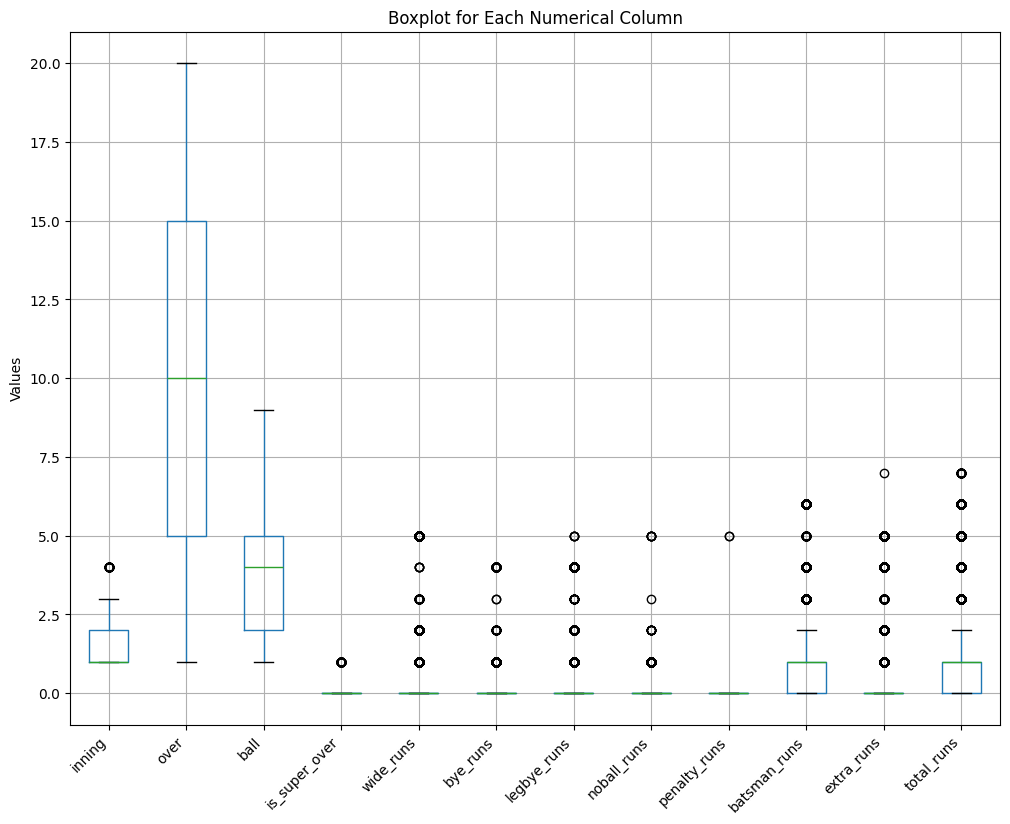

In [14]:
#Plotting a boxplot to check for outliers
plt.figure(figsize=(12, 9))
df2[['inning','over', 'ball',
       'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs']].boxplot()

plt.title('Boxplot for Each Numerical Column')
plt.ylabel('Values')
plt.xticks(rotation = 45, ha='right') #For better readability
plt.show()

# Even though there are data points extending beyond the whiskers of the boxplot, they might not necessarily qualify as outliers that warrant exclusion. Take the example of penalty runs, where a value of 5 is observed. It's not common for every match to involve high penalty runs, so if such a scenario arises with a higher value, it doesn't automatically imply that the data should be discarded. This reasoning applies to the other columns as well. Consequently, we won't be removing these rows from the dataset.

In [15]:
batting_teams = df2["batting_team"].value_counts()
bowling_teams = df2["bowling_team"].value_counts()

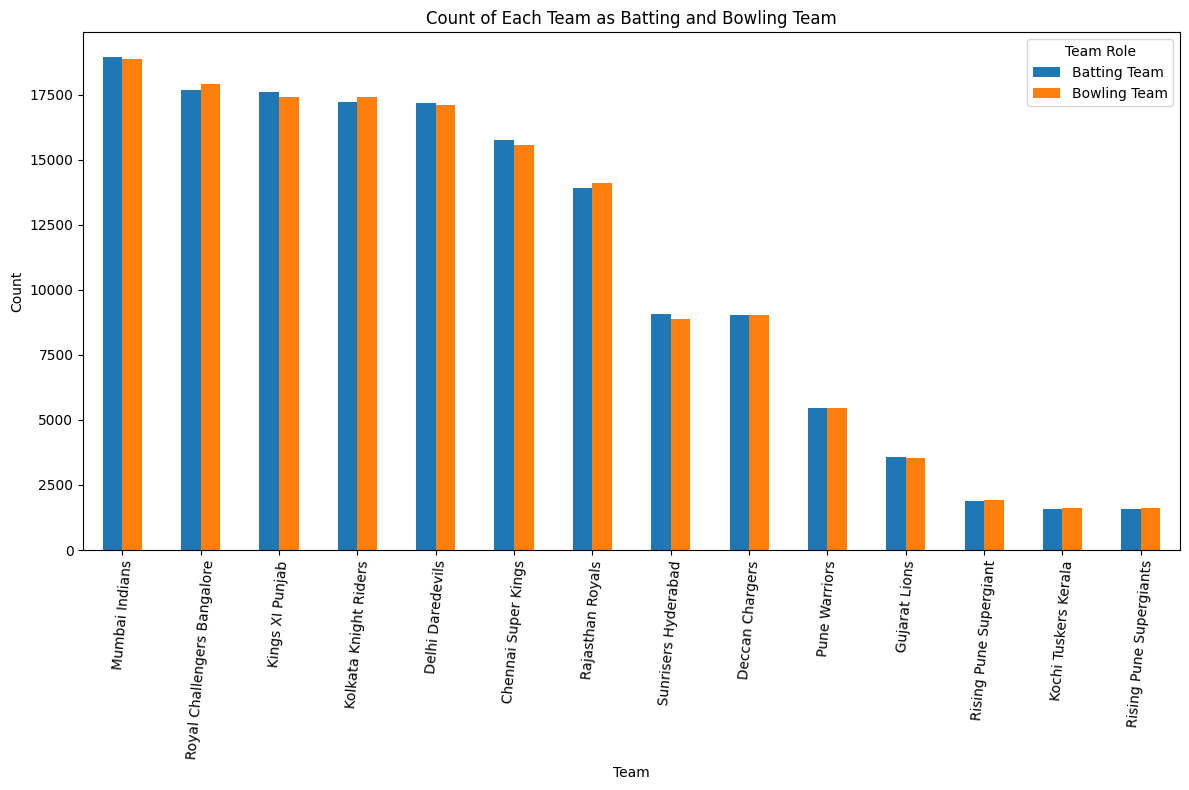

In [16]:
# Create a DataFrame with both batting and bowling counts
team_counts = pd.concat([batting_teams, bowling_teams], axis=1, keys=['Batting Team', 'Bowling Team'])

# Plot the data
team_counts.plot(kind='bar', figsize=(12, 8))
plt.title('Count of Each Team as Batting and Bowling Team')
plt.xlabel('Team')
plt.ylabel('Count')
plt.xticks(rotation=85)
plt.legend(title='Team Role')

plt.tight_layout()
plt.show()

# This shows that Mumbai Indians participated the most as a batting and bowling team.

In [18]:
dismissals = df2.groupby("dismissal_kind")["player_dismissed"].value_counts().reset_index(name="count")
dismissals

,dismissal_kind,player_dismissed,count
0,bowled,SR Watson,27
1,bowled,G Gambhir,26
2,bowled,V Kohli,24
3,bowled,MK Pandey,23
4,bowled,CH Gayle,22
...,...,...,...
1362,stumped,AD Mathews,1
1363,stumped,AG Murtaza,1
1364,stumped,AG Paunikar,1
1365,stumped,AP Majumdar,1


In [19]:
fig = px.treemap(dismissals, path=[px.Constant('Dismissals'), 'dismissal_kind','player_dismissed'], values='count',
                  color='dismissal_kind')
fig.show()

# This shows how many times each dismissal kind occured in the dataset , where inside each kind we can see the count of players who were dismissed by that kind. 

# Also we can get that the most reason behind the player's dismissals is "Caught" where the most player who was dismissed because of it is "SK Raina"

In [36]:
batsman_runs = df2.groupby(["batting_team","bowling_team","batsman"]).agg({"batsman_runs":"sum"}).reset_index().sort_values(by="batsman_runs",ascending=False)
batsman_runs

,batting_team,bowling_team,batsman,batsman_runs
3163,Royal Challengers Bangalore,Chennai Super Kings,V Kohli,706
3255,Royal Challengers Bangalore,Delhi Daredevils,V Kohli,661
3284,Royal Challengers Bangalore,Kings XI Punjab,CH Gayle,634
140,Chennai Super Kings,Mumbai Indians,SK Raina,594
2240,Mumbai Indians,Kolkata Knight Riders,RG Sharma,594
...,...,...,...,...
3384,Royal Challengers Bangalore,Kolkata Knight Riders,R Rampaul,0
2206,Mumbai Indians,Kings XI Punjab,Z Khan,0
1064,Gujarat Lions,Royal Challengers Bangalore,S Kaushik,0
2204,Mumbai Indians,Kings XI Punjab,UBT Chand,0


In [38]:
fig = px.treemap(batsman_runs, path=[px.Constant('Matches'), 'batting_team','bowling_team','batsman'], values='batsman_runs',
                  color='batting_team')
fig.show()

# The preceding treemap can be interpreted in the following manner: Initially, we examine the matches, followed by selecting the batting team of interest. We then narrow down our focus to the bowling team it faced, and proceed to observe the different batsmen involved. The size of each rectangle in the treemap corresponds to the batsman runs.

In [47]:
batsmen_runs = df2.groupby("batsman").agg({"batsman_runs":"sum"}).reset_index().sort_values(by="batsman_runs",ascending=False)
batsmen_runs

,batsman,batsman_runs
374,SK Raina,4548
431,V Kohli,4423
323,RG Sharma,4207
137,G Gambhir,4132
103,DA Warner,4014
...,...,...
51,Abdur Razzak,0
350,S Kaushik,0
351,S Ladda,0
425,U Kaul,0


In [50]:
#Let's take the top scoring batsmen
filtered_counts = batsmen_runs[batsmen_runs["batsman_runs"] > 1000]

C:\Users\sghoz\AppData\Local\Temp\ipykernel_8492\3214345772.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




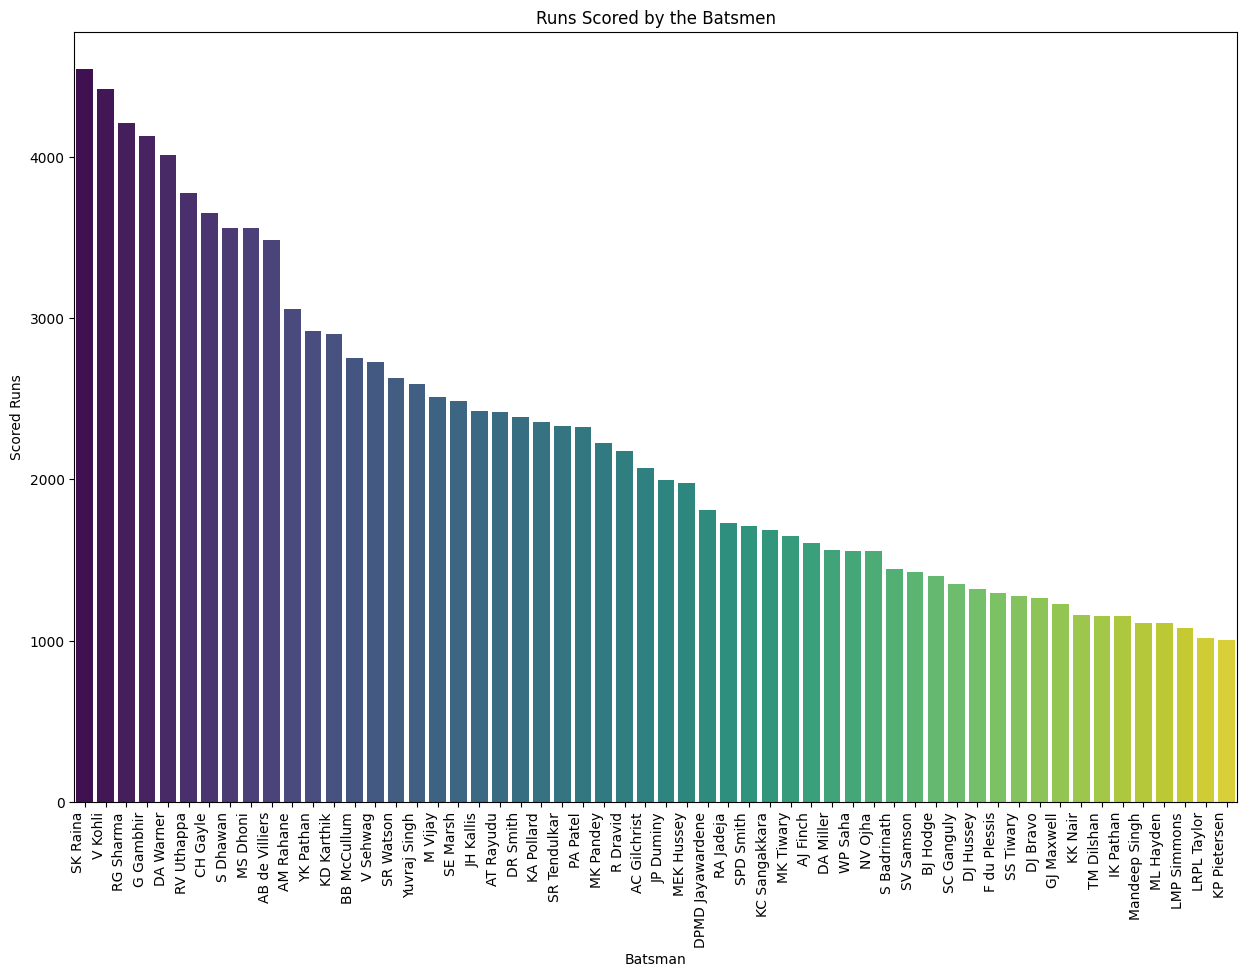

In [51]:
# Create a bar plot for the various batsmen with the runs they scored.
plt.figure(figsize=(15, 10))
sns.barplot(x=filtered_counts["batsman"], y=filtered_counts["batsman_runs"], palette='viridis')

# Formatting the y-axis tick labels as integers
#plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))

# This is used to avoid the overlapping of the labels of the x-axis
plt.xticks(rotation=90, ha='right')
plt.title('Runs Scored by the Batsmen')
plt.xlabel('Batsman')
plt.ylabel('Scored Runs')
plt.show()



# This shows that SK Raina is the batsman with the most scored runs (4548 runs) followed by V Kohli with 4423 runs.

# Let's examine each the infractions caused by each bowler

In [31]:
extra_runs = df2.groupby("bowler").agg({'wide_runs':"sum",
                                        'bye_runs': "sum",
                                        'legbye_runs':"sum",
                                        'noball_runs':"sum",
                                        'penalty_runs':"sum",
                                        'extra_runs':"sum"}).reset_index().sort_values(by="extra_runs",ascending=False)
extra_runs

,bowler,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,extra_runs
294,SL Malinga,143,22,80,18,5,268
218,P Kumar,144,5,86,1,0,236
333,UT Yadav,90,16,64,16,0,186
255,RP Singh,89,8,71,13,0,181
355,Z Khan,89,14,64,2,0,169
...,...,...,...,...,...,...,...
75,CK Kapugedera,0,0,0,0,0,0
8,A Nel,0,0,0,0,0,0
310,Sachin Baby,0,0,0,0,0,0
74,CJ McKay,0,0,0,0,0,0


In [33]:
filtered_counts = extra_runs[extra_runs["extra_runs"]  > 50 ]

,bowler,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,extra_runs
294,SL Malinga,143,22,80,18,5,268
218,P Kumar,144,5,86,1,0,236
333,UT Yadav,90,16,64,16,0,186
255,RP Singh,89,8,71,13,0,181
355,Z Khan,89,14,64,2,0,169
...,...,...,...,...,...,...,...
102,DT Christian,33,3,17,3,0,56
116,HV Patel,24,6,22,1,0,53
87,DE Bollinger,28,7,16,2,0,53
283,SB Jakati,27,2,21,2,0,52


C:\Users\sghoz\AppData\Local\Temp\ipykernel_8492\63310507.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




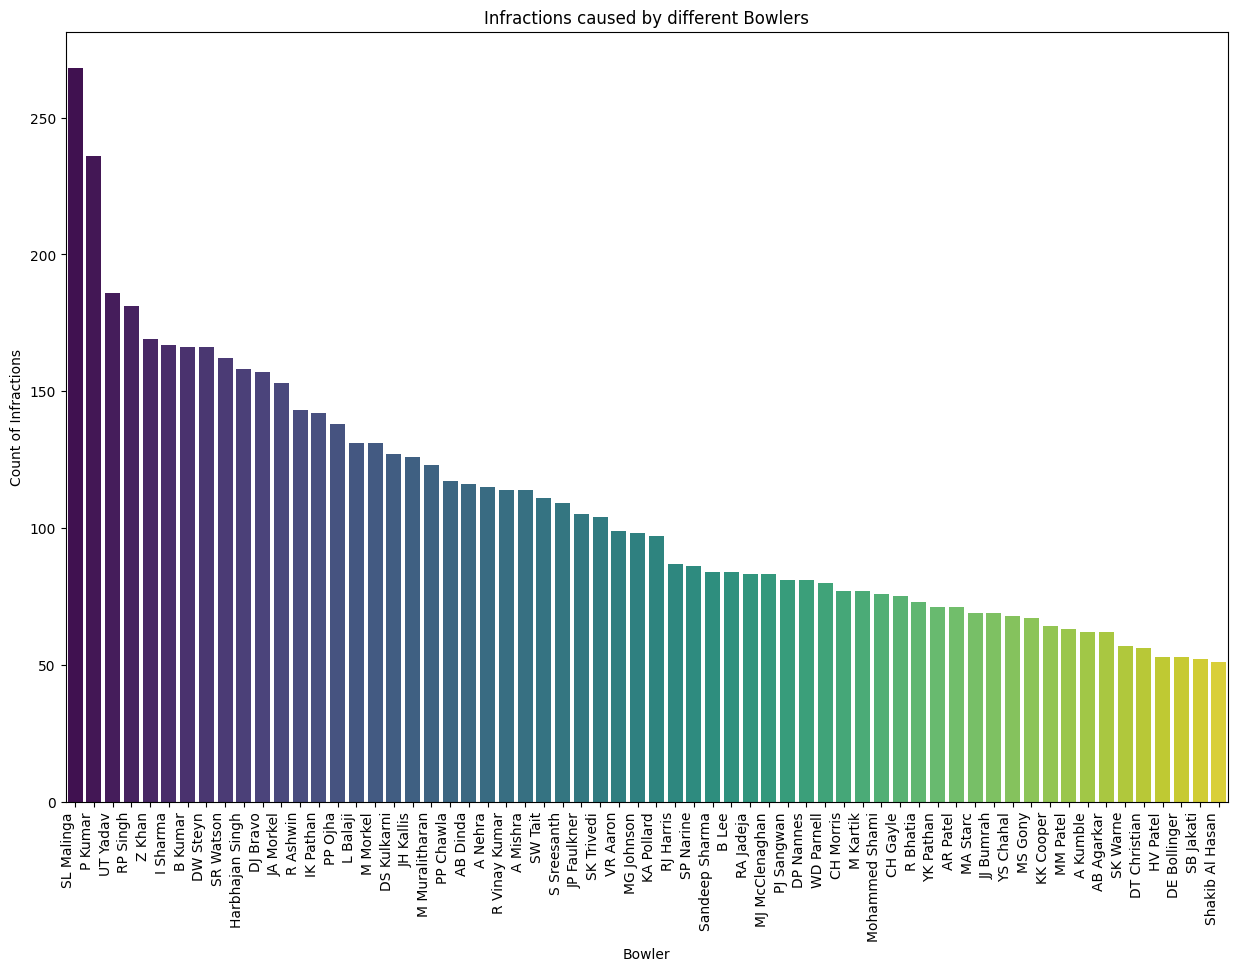

In [34]:
# Create a bar plot for the various bowlers to show how many infractions they've made.
plt.figure(figsize=(15, 10))
sns.barplot(x=filtered_counts["bowler"] , y=filtered_counts["extra_runs"], palette='viridis')

# This is used to avoid the overlapping of the labels of the x-axis
plt.xticks(rotation=90, ha='right')
plt.title('Infractions caused by different Bowlers')
plt.xlabel('Bowler')
plt.ylabel('Count of Infractions')
plt.show()

# As we can see, the bowler SK Malinga is the one who caused the most infractions in different matches (268 infractions).

In [69]:
non_strikers = df2["non_striker"].value_counts()
non_strikers

non_striker
G Gambhir           3635
SK Raina            3483
V Kohli             3351
RG Sharma           3306
S Dhawan            3248
                    ... 
TP Sudhindra           1
BW Hilfenhaus          1
TA Boult               1
S Randiv               1
PM Sarvesh Kumar       1
Name: count, Length: 458, dtype: int64

In [71]:
filtered_counts = non_strikers[non_strikers.values > 1500]

C:\Users\sghoz\AppData\Local\Temp\ipykernel_8492\2675087278.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




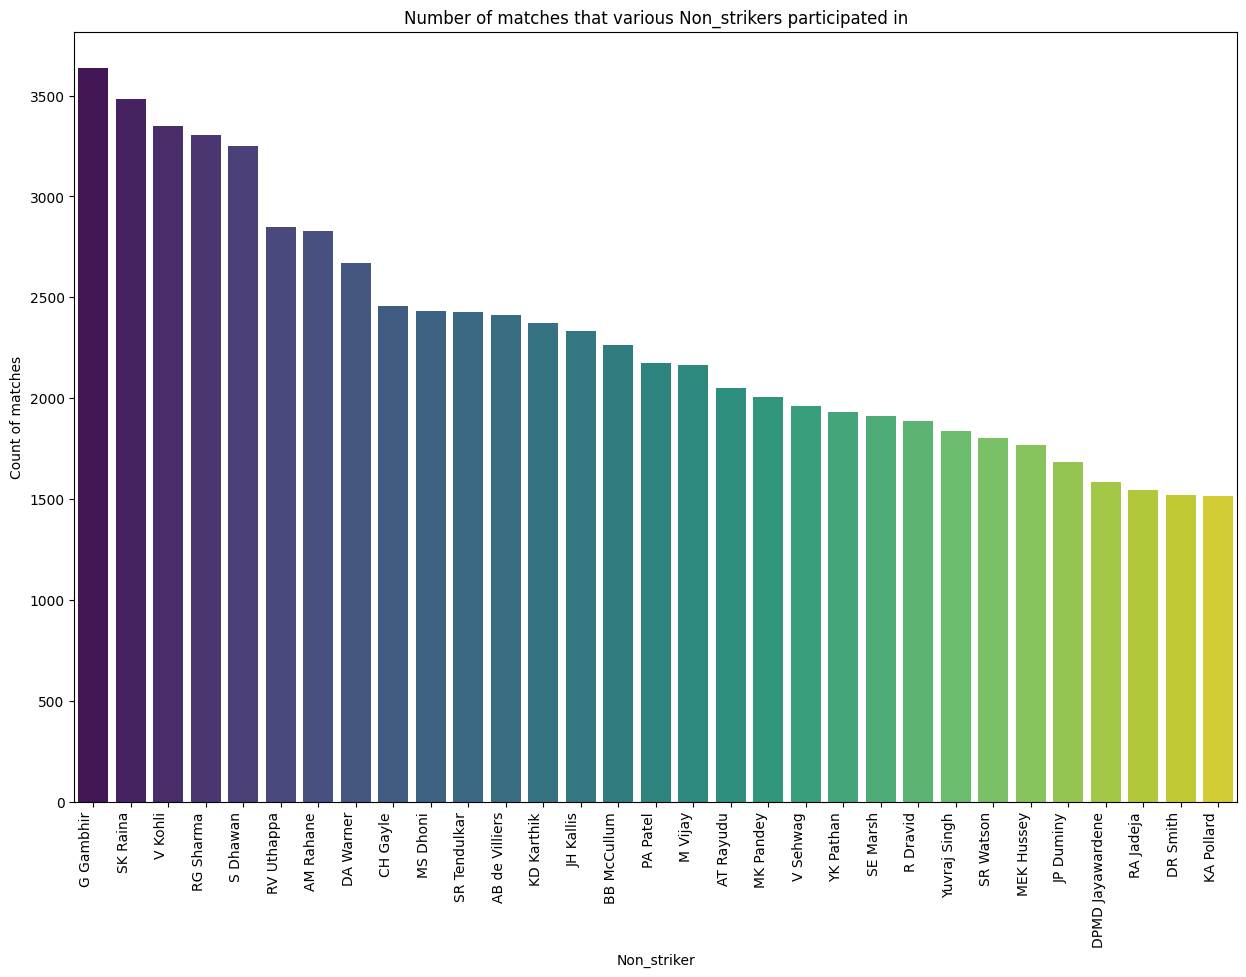

In [74]:
# Create a bar plot for the various non_strikers to show how many they've participated as non_strikers.
plt.figure(figsize=(15, 10))
sns.barplot(x=filtered_counts.index , y=filtered_counts.values, palette='viridis')

# This is used to avoid the overlapping of the labels of the x-axis
plt.xticks(rotation=90, ha='right')
plt.title('Number of matches that various Non_strikers participated in')
plt.xlabel('Non_striker')
plt.ylabel('Count of matches')
plt.show()

# G gambhir is the most one participated as non_striker (3635 matches)